# Node Classification with Tensor Features

This example demonstrates node classification using vector features with the `NodeClassifier` model.


🚀 GNN Node Classification: Tensor-based Node Features

📈 Training for 20 epochs...
------------------------------------------------------------
Epoch |       Loss |    Accuracy (%)
------------------------------------------------------------
    1 |     1.1331 |           20.00
    2 |     0.9847 |           40.00
    3 |     0.8882 |           40.00
    4 |     0.8928 |           30.00
    5 |     0.8810 |           30.00
    6 |     0.8808 |           40.00
    7 |     0.8801 |           40.00
    8 |     0.8791 |           40.00
    9 |     0.8775 |           50.00
   10 |     0.8754 |           50.00
   11 |     0.8734 |           50.00
   12 |     0.8712 |           50.00
   13 |     0.8687 |           50.00
   14 |     0.8657 |           50.00
   15 |     0.8626 |           50.00
   16 |     0.8593 |           50.00
   17 |     0.8556 |           50.00
   18 |     0.8516 |           50.00
   19 |     0.8472 |           40.00
   20 |     0.8443 |           50.00


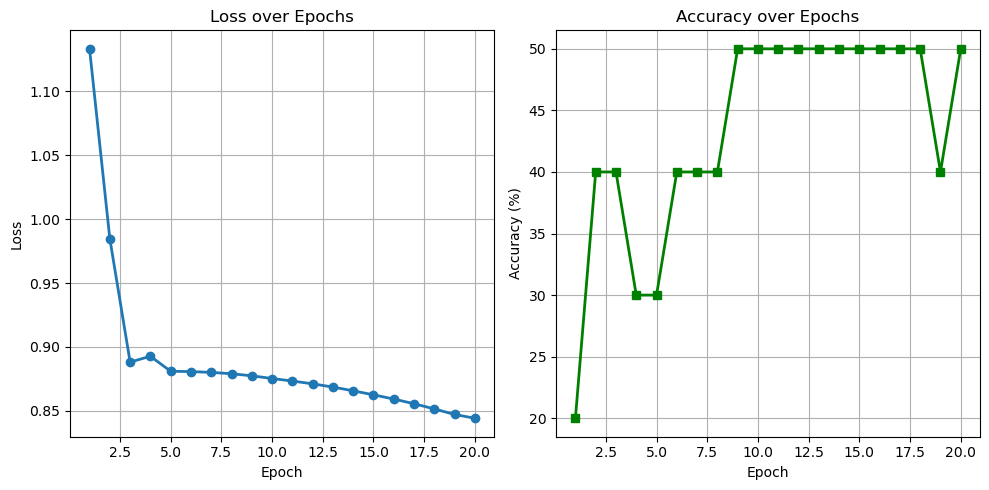


✅ Training Complete!
Final Loss     : 0.8443
Final Accuracy : 50.00%


In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from models.node_classifier import NodeClassifier
from core.graph import Graph
from core.utils import get_device

# ─────────────────────────────────────────────────────────────
# 🎯  Setup & Initialization
# ─────────────────────────────────────────────────────────────
print("\n" + "="*60)
print("🚀 GNN Node Classification: Tensor-based Node Features")
print("="*60)

# Parameters
num_nodes = 10
num_edges = 20
in_dim = 16
hidden_dim = 32
num_classes = 3
num_epochs = 20
lr = 0.01

# Create synthetic graph
node_features = torch.randn(num_nodes, in_dim)
edge_index = torch.randint(0, num_nodes, (2, num_edges))
graph = Graph(node_features, edge_index)

# Setup device
device = get_device()
graph.to(device)

# Initialize model
model = NodeClassifier(in_shape=(in_dim,), hidden_shape=(hidden_dim,), num_classes=num_classes, num_layers=3)
model.to(device)

# Loss & Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = torch.nn.CrossEntropyLoss()
labels = torch.randint(0, num_classes, (num_nodes,), device=device)

# ─────────────────────────────────────────────────────────────
# 📊 Training Loop
# ─────────────────────────────────────────────────────────────
print(f"\n📈 Training for {num_epochs} epochs...")
print("-"*60)
print(f"{'Epoch':>5} | {'Loss':>10} | {'Accuracy (%)':>15}")
print("-"*60)

loss_values = []
acc_values = []

for epoch in range(1, num_epochs + 1):
    model.train()
    optimizer.zero_grad()
    logits = model(graph.node_features, graph.edge_index)
    loss = loss_fn(logits, labels)
    loss.backward()
    optimizer.step()

    # Evaluation
    model.eval()
    preds = torch.argmax(logits, dim=1)
    correct = (preds == labels).sum().item()
    acc = 100.0 * correct / num_nodes

    # Logging
    loss_values.append(loss.item())
    acc_values.append(acc)
    print(f"{epoch:>5} | {loss.item():>10.4f} | {acc:>15.2f}")

# ─────────────────────────────────────────────────────────────
# 📈 Plotting Loss & Accuracy Curves
# ─────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', linewidth=2)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), acc_values, marker='s', linestyle='-', linewidth=2, color='green')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)

plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────────────────────
# ✅ Final Summary
# ─────────────────────────────────────────────────────────────
final_loss = loss_values[-1]
final_acc = acc_values[-1]
print("\n✅ Training Complete!")
print(f"Final Loss     : {final_loss:.4f}")
print(f"Final Accuracy : {final_acc:.2f}%")
print("="*60)
